In [1]:
!pip install opencv-python
!pip install imutils

In [2]:
from imutils import face_utils 
import numpy as np
import argparse 
import imutils
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Read Data

In [3]:
names = ['good', 'poor', 'very_poor']

def getLabel(id):
    return  ['good', 'poor', 'very_poor'][id]

def getLabelName(name):
  if name == 'good_new': return 0
  elif name == 'poor_new': return 1
  elif name == 'very_poor_new': return 2

print(getLabelName('good'))

None


In [4]:
def get_data_from_folder():
  data_dir_list = ['poor_new', 'good_new', 'very_poor_new']
  img_data_list= []
  labels = []

  for dataset in data_dir_list:
      img_list=os.listdir(dataset)
      init_label = getLabelName(dataset)
      print(dataset)
      print('Loaded the images of dataset-'+'{}\n'.format(dataset))
      print(len(img_list))
      for img in img_list:
          img_data_list.append(dataset + '/'+ img)
          labels.append(init_label)
  num_classes = 3
  Y = np_utils.to_categorical(labels, num_classes)
  return img_data_list, Y

In [5]:
os.chdir("Dataset")
print(os.getcwd())
img_data_list, y_data = get_data_from_folder()

D:\ML_Final-Project\Dataset
poor_new
Loaded the images of dataset-poor_new

91
good_new
Loaded the images of dataset-good_new

127
very_poor_new
Loaded the images of dataset-very_poor_new

91


In [6]:
# os.chdir("D:/ML_Final-Project")
# os.getcwd()

# Praproses : Road Segmentation

## Crop Manual

### good

In [7]:
# good
for i in range(100,129):
  try:
    name = 'good/good_'+str(i)+'.JPG'
    img = cv2.imread(name)

    h,w = img.shape[:2]

    x = 100
    width = w - 700
    y = 1000
    height = h -20
    img = img[y:height, x:width]

    print(img.shape[:2])

    dim = (400, 400)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2_imshow(img)

    cv2.imwrite('good_new/good_'+str(i)+'.JPG',img)
  except:
    print('skip')

(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip
(410, 1129)
skip


### poor

In [8]:
# poor
for i in range(390,397):
  try:
    name = 'poor/poor_'+str(i)+'.jpg'
    img = cv2.imread(name)

    h,w = img.shape[:2]
    print(img.shape[:2])

    x = 100
    width = w
    y = 350
    height = h - 120
    img = img[y:height, x:width]

    print(img.shape[:2])

    dim = (400, 400)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2_imshow(img)

    cv2.imwrite('poor_new/poor_'+str(i)+'.jpg',img)
  except:
    print('skip')

(600, 600)
(130, 500)
skip
(600, 600)
(130, 500)
skip
(600, 600)
(130, 500)
skip
(600, 600)
(130, 500)
skip
(600, 600)
(130, 500)
skip
(600, 600)
(130, 500)
skip
(600, 600)
(130, 500)
skip


### satisfactory

### very poor

In [9]:
# very poor
for i in range(200,202):
  try:
    name = 'very_poor/verypoor_'+str(i)+'.jpg'
    img = cv2.imread(name)

    h,w = img.shape[:2]
    print(img.shape[:2])

    x = 200
    width = w-200
    y = 200
    height = h
    img = img[y:height, x:width]

    print(img.shape[:2])

    dim = (400, 400)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2_imshow(img)

    cv2.imwrite('very_poor_new/verypoor_00'+str(i)+'.jpg',img)
  except:
    print('skip')

(430, 626)
(230, 226)
skip
(520, 1410)
(320, 1010)
skip


# Get Array

In [10]:
def praproses(img):
  #ubah ukuran
  dim = (100, 100)
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

  #grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

In [11]:
def get_array_img(img_data_list):
  hasil_feature = []
  for i in img_data_list:
    hasil = cv2.imread(i)
    print(i)
    hasil_praproses=praproses(hasil)
    hasil_feature.append(hasil_praproses)

  img_data = np.array(hasil_feature)
  img_data = img_data.astype('float32')
  img_data = img_data/255
  img_data.shape
  return img_data

In [12]:
# get array image train
data_array = get_array_img(img_data_list)

poor_new/poor_140.jpg
poor_new/poor_141.jpg
poor_new/poor_181.jpg
poor_new/poor_182.jpg
poor_new/poor_183.jpg
poor_new/poor_184.jpg
poor_new/poor_185.jpg
poor_new/poor_186.jpg
poor_new/poor_187.jpg
poor_new/poor_188.jpg
poor_new/poor_189.jpg
poor_new/poor_190.jpg
poor_new/poor_191.jpg
poor_new/poor_192.jpg
poor_new/poor_193.jpg
poor_new/poor_194.jpg
poor_new/poor_195.jpg
poor_new/poor_196.jpg
poor_new/poor_242.jpg
poor_new/poor_243.jpg
poor_new/poor_244.jpg
poor_new/poor_245.jpg
poor_new/poor_246.jpg
poor_new/poor_247.jpg
poor_new/poor_248.jpg
poor_new/poor_249.jpg
poor_new/poor_250.jpg
poor_new/poor_251.jpg
poor_new/poor_252.jpg
poor_new/poor_253.jpg
poor_new/poor_254.jpg
poor_new/poor_255.jpg
poor_new/poor_258.jpg
poor_new/poor_259.jpg
poor_new/poor_260.jpg
poor_new/poor_261.jpg
poor_new/poor_266.jpg
poor_new/poor_267.jpg
poor_new/poor_268.jpg
poor_new/poor_270.jpg
poor_new/poor_271.jpg
poor_new/poor_272.jpg
poor_new/poor_273.jpg
poor_new/poor_274.jpg
poor_new/poor_292.jpg
poor_new/p

# Split Data

In [13]:
# split
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_array, y_data, test_size=0.3, random_state=42)
X_train.shape

(216, 100, 100)

In [14]:
X_train = X_train.reshape(-1, 100, 100, 1)
X_val = X_val.reshape(-1, 100, 100, 1)

# Train

In [15]:
import keras

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

def create_model():
    input_shape=(100,100,1)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    # model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    # model.add(Dropout(0.3))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    # model.add(Dropout(0.3))

    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    # model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    # model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.8))
    model.add(Dense(3, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='Adam')
    
    return model


In [16]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    featurewise_center=True,
    # featurewise_std_normalization=True,
    # rescale=1./255,
    # rotation_range=25, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    # shear_range=0.2, 
    # zoom_range=0.2,
    # horizontal_flip=True,
    fill_mode="nearest"
  )

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
BS = 8
EPOCHS = 200
result = []
scores_loss = []
scores_acc = []
k_no = 4

file_path = "Weight/weights_best_"+str(k_no)+".hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
# early = EarlyStopping(monitor="loss", mode="min", patience=20)

callbacks_list = [checkpoint]

model = create_model()
hist = model.fit_generator(aug.flow(X_train, y_train), epochs=EPOCHS,validation_data=(X_val, y_val), callbacks=callbacks_list, verbose=2)

# hist = model.fit(X_train, y_train, epochs=EPOCHS,validation_data=(X_val, y_val), callbacks=callbacks_list, verbose=2)
# hist = model.fit(X_Train_, Y_Train, epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=0)
# model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs, validation_data=(X_Test, Y_Test), verbose=1)
model.save_weights(file_path)
model.load_weights(file_path)
result.append(model.predict(X_val))
score = model.evaluate(X_val,y_val, verbose=1)
scores_loss.append(score[0])
scores_acc.append(score[1])
# k_no+=1
print("ok")

D:\Anaconda\envs\tf2.4\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
D:\Anaconda\envs\tf2.4\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/200
7/7 - 3s - loss: 1.1008 - accuracy: 0.3519 - val_loss: 1.0793 - val_accuracy: 0.5161

Epoch 00001: loss improved from inf to 1.10077, saving model to Weight\weights_best_4.hdf5
Epoch 2/200
7/7 - 0s - loss: 1.0792 - accuracy: 0.4352 - val_loss: 1.0579 - val_accuracy: 0.4946

Epoch 00002: loss improved from 1.10077 to 1.07922, saving model to Weight\weights_best_4.hdf5
Epoch 3/200
7/7 - 0s - loss: 1.0639 - accuracy: 0.4167 - val_loss: 1.0436 - val_accuracy: 0.5699

Epoch 00003: loss improved from 1.07922 to 1.06387, saving model to Weight\weights_best_4.hdf5
Epoch 4/200
7/7 - 0s - loss: 1.0652 - accuracy: 0.4120 - val_loss: 1.0235 - val_accuracy: 0.5161

Epoch 00004: loss did not improve from 1.06387
Epoch 5/200
7/7 - 0s - loss: 1.0215 - accuracy: 0.4583 - val_loss: 0.9985 - val_accuracy: 0.5376

Epoch 00005: loss improved from 1.06387 to 1.02154, saving model to Weight\weights_best_4.hdf5
Epoch 6/200
7/7 - 0s - loss: 1.0286 - accuracy: 0.5093 - val_loss: 0.9659 - val_accurac


Epoch 00047: loss did not improve from 0.26752
Epoch 48/200
7/7 - 0s - loss: 0.2824 - accuracy: 0.8981 - val_loss: 0.1592 - val_accuracy: 0.9355

Epoch 00048: loss did not improve from 0.26752
Epoch 49/200
7/7 - 0s - loss: 0.2733 - accuracy: 0.9028 - val_loss: 0.1517 - val_accuracy: 0.9355

Epoch 00049: loss did not improve from 0.26752
Epoch 50/200
7/7 - 0s - loss: 0.2946 - accuracy: 0.8657 - val_loss: 0.1494 - val_accuracy: 0.9462

Epoch 00050: loss did not improve from 0.26752
Epoch 51/200
7/7 - 0s - loss: 0.2833 - accuracy: 0.8935 - val_loss: 0.1274 - val_accuracy: 0.9677

Epoch 00051: loss did not improve from 0.26752
Epoch 52/200
7/7 - 0s - loss: 0.2805 - accuracy: 0.8796 - val_loss: 0.2014 - val_accuracy: 0.9032

Epoch 00052: loss did not improve from 0.26752
Epoch 53/200
7/7 - 0s - loss: 0.2818 - accuracy: 0.8519 - val_loss: 0.1382 - val_accuracy: 0.9570

Epoch 00053: loss did not improve from 0.26752
Epoch 54/200
7/7 - 0s - loss: 0.3116 - accuracy: 0.8981 - val_loss: 0.3137 -


Epoch 00100: loss did not improve from 0.11874
Epoch 101/200
7/7 - 0s - loss: 0.1832 - accuracy: 0.9167 - val_loss: 0.0877 - val_accuracy: 0.9785

Epoch 00101: loss did not improve from 0.11874
Epoch 102/200
7/7 - 0s - loss: 0.1765 - accuracy: 0.9167 - val_loss: 0.1439 - val_accuracy: 0.9355

Epoch 00102: loss did not improve from 0.11874
Epoch 103/200
7/7 - 0s - loss: 0.1402 - accuracy: 0.9491 - val_loss: 0.0927 - val_accuracy: 0.9677

Epoch 00103: loss did not improve from 0.11874
Epoch 104/200
7/7 - 0s - loss: 0.1240 - accuracy: 0.9444 - val_loss: 0.0922 - val_accuracy: 0.9677

Epoch 00104: loss did not improve from 0.11874
Epoch 105/200
7/7 - 0s - loss: 0.1349 - accuracy: 0.9537 - val_loss: 0.1362 - val_accuracy: 0.9677

Epoch 00105: loss did not improve from 0.11874
Epoch 106/200
7/7 - 0s - loss: 0.1493 - accuracy: 0.9398 - val_loss: 0.1063 - val_accuracy: 0.9677

Epoch 00106: loss did not improve from 0.11874
Epoch 107/200
7/7 - 0s - loss: 0.1735 - accuracy: 0.9213 - val_loss: 0


Epoch 00155: loss did not improve from 0.07849
Epoch 156/200
7/7 - 0s - loss: 0.1193 - accuracy: 0.9722 - val_loss: 0.1111 - val_accuracy: 0.9570

Epoch 00156: loss did not improve from 0.07849
Epoch 157/200
7/7 - 0s - loss: 0.1087 - accuracy: 0.9491 - val_loss: 0.0876 - val_accuracy: 0.9785

Epoch 00157: loss did not improve from 0.07849
Epoch 158/200
7/7 - 0s - loss: 0.0625 - accuracy: 0.9907 - val_loss: 0.0981 - val_accuracy: 0.9677

Epoch 00158: loss improved from 0.07849 to 0.06249, saving model to Weight\weights_best_4.hdf5
Epoch 159/200
7/7 - 0s - loss: 0.0833 - accuracy: 0.9583 - val_loss: 0.1047 - val_accuracy: 0.9785

Epoch 00159: loss did not improve from 0.06249
Epoch 160/200
7/7 - 0s - loss: 0.0820 - accuracy: 0.9630 - val_loss: 0.1032 - val_accuracy: 0.9785

Epoch 00160: loss did not improve from 0.06249
Epoch 161/200
7/7 - 0s - loss: 0.1002 - accuracy: 0.9583 - val_loss: 0.0893 - val_accuracy: 0.9785

Epoch 00161: loss did not improve from 0.06249
Epoch 162/200
7/7 - 0s

In [18]:
print(scores_acc,scores_loss)

[0.9677419066429138] [0.1688416302204132]


In [19]:
model.load_weights("Weight/weights_best_"+str(k_no)+".hdf5")

In [20]:
best_model = model

# Evaluation Data Test

In [21]:
score = best_model.evaluate(X_val, y_val, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#predict
y_pred = best_model.predict(X_val)

Test Loss: 0.1688416302204132
Test accuracy: 0.9677419066429138


# Visualization

## Perbandingan Nilai Akurasi dan Loss antara Data Train dan Validation

maks train acc:  0.9537037014961243
maks validation acc:  0.9677419066429138


<Figure size 432x288 with 0 Axes>

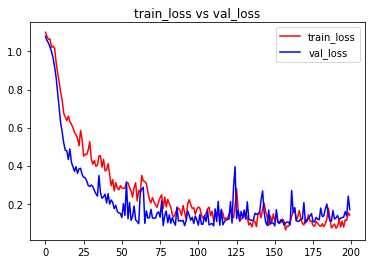

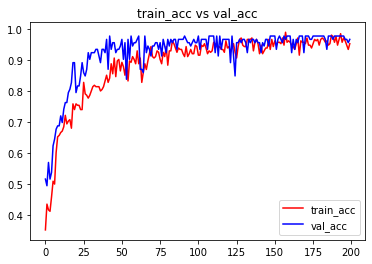

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
print("maks train acc: ", train_acc[-1])
val_acc=hist.history['val_accuracy']
print("maks validation acc: ", val_acc[-1])
epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [23]:
#Model Save
best_model.save_weights('model_weights2.h5')
best_model.save('model_keras2.h5')

## Hasil uji coba data test

In [24]:
from sklearn.metrics import confusion_matrix
results = best_model.predict_classes(X_val)
cm = confusion_matrix(np.where(y_val == 1)[1], results)
#cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

D:\Anaconda\envs\tf2.4\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
import seaborn as sns
import pandas as pd

In [26]:
label_mapdisgust = ['good', 'poor','very_poor']

In [27]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

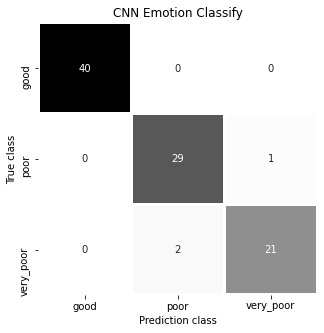

In [28]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()